In [ ]:
"""
1. specify the size of the buffer
2. including the buffer results and regular results
3. plots
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import FuncFormatter
import matplotlib
import matplotlib.ticker as mtick
# plt.rcParams["font.family"] = "arial"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

gloyend = None


# Main
dashes=[(2,2), (4,1), (2,0), (2,0), (3, 3), (2, 0)]
markers = ['x', '|', '.', 'D', 'd', '']
# colors = ['grey', '#FF7F0E', '#2077B4', '#D62728', '#0A640C', '#343434']
colors = ['grey', '#FF7F0E', '#2077B4', '#D62728', '#0A640C', '#343434']
colors = colors[::-1]

def plot(X, Y1, Y2_set, b_size, choice, root_path):
    fig, ax = plt.subplots(figsize=(8, 3.6))
    
    for idx, Y2 in enumerate(Y2_set):
        ax.plot(X, Y2, color=colors[idx], marker=markers[idx], dashes=dashes[idx], label = buffer_size[idx] + 'KB-Buffer', alpha=0.8, fillstyle='none', markersize=8)
    
    if (len(Y1) != 0):
        ax.plot(X, Y1, color=colors[-1], marker=markers[-1], dashes=dashes[-1], label = 'CCEH', alpha=0.8, fillstyle='none', markersize=8)
    
    ax.legend(loc="upper left")
    
    # ax.tick_params(axis="y", direction="inout", pad=-20)
    # ax.tick_params(axis="x", direction="inout", pad=-15)
    
    ax.grid(which='major', linestyle='--', zorder=0)
    ax.grid(which='minor', linestyle='--', zorder=0, linewidth=0.3)
    ax.xaxis.grid(False, which='both')
    ax.locator_params(integer=True)
    
#     ax.set_title(''), fontsize = 14)
    ax.set_xlabel('Throughput (Mops/s)', fontsize=12)
    ax.set_xlabel('# of threads', fontsize=12)
    
    if (choice == "throughput"):
        ax.set_ylabel('Throughput (Mop/s)', fontsize=12)
        fig.savefig(root_path + "CCEH-Throughput.pdf", bbox_inches='tight', pad_inches=0)
    if (choice == "bandwidth"):
        ax.set_ylabel('Bandwidth (MB/s)', fontsize=12)
        fig.savefig(root_path + "CCEH-Bandwidth.pdf", bbox_inches='tight', pad_inches=0)
        
import pandas as pd

def get_results_single_col(path):
    df=pd.read_csv(path, sep=',', header=None)
#     print(df.values.flatten())
    origin_throughput = df.values.flatten()
    return origin_throughput
        
def get_results(path):
    results = []
    """
    0: operations
    1: # of key left (buffer)
    2: real operations
    3: # of segments
    4: # of buffers
    5: real elapsed
    6: IO(Read) MB
    7: IO(Write) MB
    8: Throughput(Mops/s)
    9: Bandwidth(MB/s)
    """
    with open(path, "r") as f:
        for line in f.readlines():
            attr = line.strip().split()
            if not attr:
                continue
            attr = [float(e) for e in attr]
            results.append(attr)
    results = np.array(results)
#     print(results.shape)
    return results[:20]


if __name__ == "__main__":
    results_dict = {
        1 : "throughput",
        2 : "bandwidth",
    }
        
    choice = 1
    root_path = './results/'
    
    # specify the size of the buffer 
#     buffer_size = ['1', '2', '4', '8', '16']
#     buffer_size = ['16', '8', '4', '2', '1']
    buffer_size = ['16', '8', '4', '2', '1']
    threads = [i for i in range(1, 21)]
    buffer_results_set = []
    regular_results = []
    
    if (choice in [1, 2]):
        # get the results of origin CCEH
        if (results_dict[choice] == "bandwidth"):
            regular_results = get_results('CCEH-bandwidth.txt')
        elif (results_dict[choice] == "throughput"):
            regular_results = get_results(root_path + 'CCEH_throughput.txt')
        
        # get the results of buffer CCEH
        for bz in buffer_size:
            buffer_results = get_results(root_path + '/' + 'CCEH_buflog_' + bz + 'K_throughput.txt')
            buffer_results_set.append(buffer_results)

        buffer_results_set = np.array(buffer_results_set, dtype = float)

        choice_results_set = []
        if (results_dict[choice] == "bandwidth"):
            choice_results_set = buffer_results_set[:,:]
        if (results_dict[choice] == "throughput"):
            choice_results_set = buffer_results_set[:,:]

        # plot
        plot(threads, regular_results, choice_results_set, buffer_size, results_dict[choice], root_path)



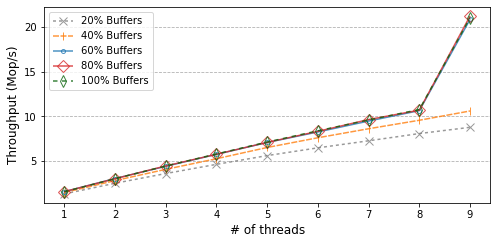

In [1]:
"""
1. specify the size of the buffer
2. including the buffer results and regular results
3. plots
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import FuncFormatter
import matplotlib
import matplotlib.ticker as mtick
# plt.rcParams["font.family"] = "arial"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

gloyend = None


# Main
dashes=[(2,2), (4,1), (2,0), (2,0), (3, 3), (2, 0)]
markers = ['x', '|', '.', 'D', 'd', '']
# colors = ['grey', '#FF7F0E', '#2077B4', '#D62728', '#0A640C', '#343434']
colors = ['grey', '#FF7F0E', '#2077B4', '#D62728', '#0A640C', '#343434']
label = ['20% Buffers', '40% Buffers', '60% Buffers', '80% Buffers', '100% Buffers']

def plot(X, Y1):
    fig, ax = plt.subplots(figsize=(8, 3.6))
    
    for idx, Y in enumerate(Y1):
        ax.plot(X[:9], Y[:9], color=colors[idx], marker=markers[idx], dashes=dashes[idx], label = label[idx], alpha=0.8, fillstyle='none', markersize=8)
    
    ax.legend(loc="upper left")
    
    # ax.tick_params(axis="y", direction="inout", pad=-20)
    # ax.tick_params(axis="x", direction="inout", pad=-15)
    
    ax.grid(which='major', linestyle='--', zorder=0)
    ax.grid(which='minor', linestyle='--', zorder=0, linewidth=0.3)
    ax.xaxis.grid(False, which='both')
    ax.locator_params(integer=True)
    
#     ax.set_title(''), fontsize = 14)
#     ax.set_xlabel('Throughput (Mops/s)', fontsize=12)
    ax.set_xlabel('# of threads', fontsize=12)
    
    ax.set_ylabel('Throughput (Mop/s)', fontsize=12)
#     fig.savefig(root_path + "CCEH-Throughput.pdf", bbox_inches='tight', pad_inches=0)


if __name__ == "__main__":

    threads = [i for i in range(1, 11)]
    
    regular_results = [
        [1.32,2.51,3.60,4.63,5.61,6.48,7.27,8.08,8.78, 14.75],
        [1.47,2.81,4.07,5.26,6.52,7.61,8.62,9.57,10.61, 18.01],
        [1.57,3.04,4.41,5.75,7.08,8.26,9.48,10.65,20.87],
        [1.57,3.02,4.45,5.76,7.09,8.33,9.65,10.70,21.25],
        [1.56,3.02,4.44,5.79,7.13,8.39,9.60,10.77,21.05]
    ]
    # plot
    plot(threads, regular_results)




## Fast Recovery

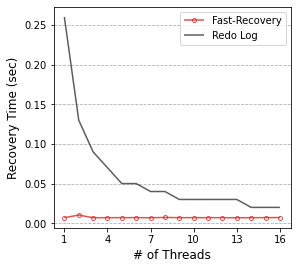

In [5]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import FuncFormatter
import matplotlib
# plt.rcParams["font.family"] = "arial"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

gloyend = None
# Main
dashes=[(2,2), (4,1), (2,0), (2,0), (3, 3), (2, 0), (2,2), (4,1), (2,0), (2,0), (3, 3), (2, 0)]
markers = ['x', '|', '.', 'D', 'd', '', 'x', '|', '.', 'D', 'd', '']
colors = ['grey', '#FF7F0E', '#2077B4', '#D62728', '#0A640C', '#343434', 'grey', '#FF7F0E', '#2077B4', '#D62728', '#0A640C', '#343434']
# colors = ['#2077B4', '#D62728', '#0A640C', '#343434']

label = ['Redo Log', 'Fast-Recovery']

# d0 d1 represents dynamic CCEH data
# f0 f1 represents fixed CCEH data

fig, ax = plt.subplots(figsize=(4, 3.6), constrained_layout=True, sharex=True, sharey=True)

t = [i for i in range(1,17)]
r1 = [0.007015, 0.010317, 0.006994, 0.007034, 0.007095,0.0071,0.006954,0.007373,0.00706,0.0071,0.00706,0.00706,0.006939,0.007036,0.007136,0.00718]

r3 = [0.26,0.13,0.09,0.07,0.05,0.05,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02]
ax.plot(t, r1, color=colors[3], marker=markers[2], dashes=dashes[2], label = label[1], alpha=0.8, fillstyle='none', markersize=8)
ax.plot(t, r3, color=colors[5], marker=markers[5], dashes=dashes[5], label = label[0], alpha=0.8, fillstyle='none', markersize=8)

ax.legend(loc="upper right")
ax.grid(which='major', linestyle='--', zorder=0)
ax.grid(which='minor', linestyle='--', zorder=0, linewidth=0.3)
ax.xaxis.grid(False, which='both')
ax.set_xticks(np.arange(1, 17, 3))

# ax[0,1].set_title('Time Epoch(1 secs) Throughput \n CCEH0 70% Write CCEH1 100% Write', fontsize = 14)
ax.set_xlabel('# of Threads', fontsize=12)
ax.set_ylabel('Recovery Time (sec)', fontsize=12)


# fig.suptitle(f'CCEH0 0% Write CCEH1 100% Write (Buffer-70K)', fontsize = 14)
# fig.supxlabel('Time Epoch (secs)', fontsize=18)
# fig.supylabel('Throughput (Mops/s)', fontsize=18)

fig.savefig("recovery.pdf", bbox_inches='tight', pad_inches=0)

Text(0, 0.5, 'Recovery Time (sec)')

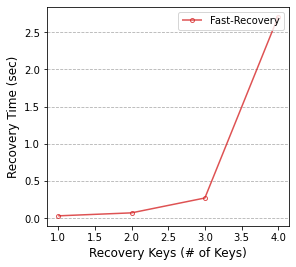

In [7]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import FuncFormatter
import matplotlib
# plt.rcParams["font.family"] = "arial"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

gloyend = None
# Main
dashes=[(2,2), (4,1), (2,0), (2,0), (3, 3), (2, 0), (2,2), (4,1), (2,0), (2,0), (3, 3), (2, 0)]
markers = ['x', '|', '.', 'D', 'd', '', 'x', '|', '.', 'D', 'd', '']
colors = ['grey', '#FF7F0E', '#2077B4', '#D62728', '#0A640C', '#343434', 'grey', '#FF7F0E', '#2077B4', '#D62728', '#0A640C', '#343434']
# colors = ['#2077B4', '#D62728', '#0A640C', '#343434']

label = ['Redo Log', 'Fast-Recovery']

# d0 d1 represents dynamic CCEH data
# f0 f1 represents fixed CCEH data

fig, ax = plt.subplots(figsize=(4, 3.6), constrained_layout=True, sharex=True, sharey=True)

# ops = [1000000, 5000000, 10000000, 50000000]
ops = [1, 2, 3, 4]
t = [0.03, 0.07, 0.27, 2.71]

ax.plot(ops, t, color=colors[3], marker=markers[2], dashes=dashes[2], label = label[1], alpha=0.8, fillstyle='none', markersize=8)
# ax.plot(t, r3, color=colors[5], marker=markers[5], dashes=dashes[5], label = label[0], alpha=0.8, fillstyle='none', markersize=8)

ax.legend(loc="upper right")
ax.grid(which='major', linestyle='--', zorder=0)
ax.grid(which='minor', linestyle='--', zorder=0, linewidth=0.3)
ax.xaxis.grid(False, which='both')
# ax.set_xticks(np.arange(1, 17, 3))

# ax[0,1].set_title('Time Epoch(1 secs) Throughput \n CCEH0 70% Write CCEH1 100% Write', fontsize = 14)
ax.set_xlabel('Recovery Keys (# of Keys)', fontsize=12)
ax.set_ylabel('Recovery Time (sec)', fontsize=12)


# fig.suptitle(f'CCEH0 0% Write CCEH1 100% Write (Buffer-70K)', fontsize = 14)
# fig.supxlabel('Time Epoch (secs)', fontsize=18)
# fig.supylabel('Throughput (Mops/s)', fontsize=18)

# fig.savefig("recovery.pdf", bbox_inches='tight', pad_inches=0)